Number of mislabeled points out of a total 135 points : 7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.88      0.98      0.92        44
           2       0.98      0.87      0.92        46

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135

[[45  0  0]
 [ 0 43  1]
 [ 0  6 40]]
Type H for Heatmap of Confusion Matrix, Type C for ROC Curveh


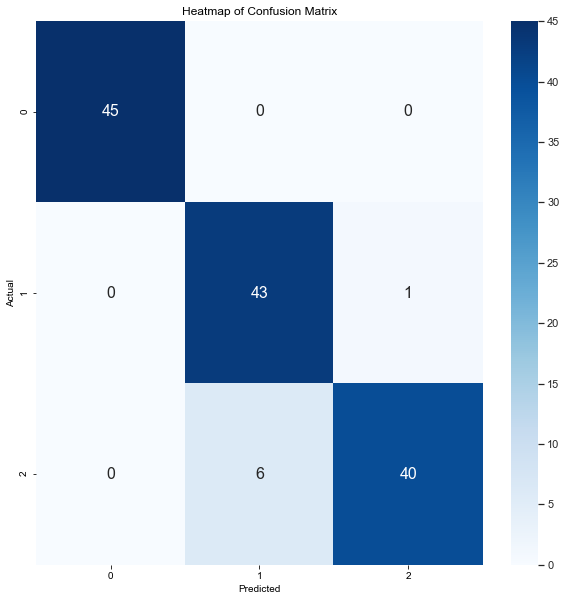

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

def rocAucScoreMulticlass(actualClass, predClass, average = "macro"):
  uniqueClass = set(actualClass)
  rocAucDict = {}
  for perClass in uniqueClass:
    otherClass = [x for x in uniqueClass if x != perClass]
    newActualClass = [0 if x in otherClass else 1 for x in actualClass]
    newPredClass = [0 if x in otherClass else 1 for x in predClass]
    rocAuc = roc_auc_score(newActualClass, newPredClass, average = average)
    rocAucDict[perClass] = roc_auc
  return rocAucDict

irisX,irisY=load_iris(return_X_y=True)
xTrain,xTest,yTrain,yTest=train_test_split(irisX,irisY,test_size=.90,random_state=0)
#model=BernoulliNB()
model=GaussianNB()
yPred=model.fit(xTrain,yTrain).predict(xTest)
yPredProb = model.predict_proba(xTest)[:,2]
print("Number of mislabeled points out of a total %d points : %d"% (xTest.shape[0], (yTest!=yPred).sum()))
print(classification_report(yTest, yPred))
cm=(confusion_matrix(yTest, yPred))
print(cm)
n=input("Type H for Heatmap of Confusion Matrix, Type C for ROC Curve")
if(n=="h"):
    cmDf=pd.DataFrame(cm,columns=np.unique(yTest),index=np.unique(yTest))
    cmDf.index.name="Actual"
    cmDf.columns.name="Predicted"
    plt.figure(figsize=(10,10))
    plt.title('Heatmap of Confusion Matrix')
    sn.set(font_scale=1.0)
    sn.heatmap(cmDf, cmap="Blues", annot=True,annot_kws={"size": 16})
if (n=="c"):
    fpr, tpr, thresholds =roc_curve(yTest, yPredProb, pos_label=2)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")